In [6]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

In [7]:
df = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/DataAnalytics/master/dataset/Healthy%20Lifestyle%20Cities%20Report%202021/healthy_lifestyle_city_2021.csv")

In [8]:
sns.set_theme(style="whitegrid")

In [9]:
df.head()

,City,Rank,Sunshine hours(City),Cost of a bottle of water(City),Obesity levels(Country),Life expectancy(years) (Country),Pollution(Index score) (City),Annual avg. hours worked,Happiness levels(Country),Outdoor activities(City),Number of take out places(City),Cost of a monthly gym membership(City)
0,Amsterdam,1,1858,£1.92,20.40%,81.2,30.93,1434,7.44,422,1048,£34.90
1,Sydney,2,2636,£1.48,29.00%,82.1,26.86,1712,7.22,406,1103,£41.66
2,Vienna,3,1884,£1.94,20.10%,81.0,17.33,1501,7.29,132,1008,£25.74
3,Stockholm,4,1821,£1.72,20.60%,81.8,19.63,1452,7.35,129,598,£37.31
4,Copenhagen,5,1630,£2.19,19.70%,79.8,21.24,1380,7.64,154,523,£32.53


In [10]:
df.isnull().sum()

City                                      0
Rank                                      0
Sunshine hours(City)                      0
Cost of a bottle of water(City)           0
Obesity levels(Country)                   0
Life expectancy(years) (Country)          0
Pollution(Index score) (City)             0
Annual avg. hours worked                  0
Happiness levels(Country)                 0
Outdoor activities(City)                  0
Number of take out places(City)           0
Cost of a monthly gym membership(City)    0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   City                                    44 non-null     object 
 1   Rank                                    44 non-null     int64  
 2   Sunshine hours(City)                    44 non-null     object 
 3   Cost of a bottle of water(City)         44 non-null     object 
 4   Obesity levels(Country)                 44 non-null     object 
 5   Life expectancy(years) (Country)        44 non-null     float64
 6   Pollution(Index score) (City)           44 non-null     object 
 7   Annual avg. hours worked                44 non-null     object 
 8   Happiness levels(Country)               44 non-null     float64
 9   Outdoor activities(City)                44 non-null     int64  
 10  Number of take out places(City)         44 non-null     int64  


In [12]:
cols_to_change = ['Sunshine hours(City)', 
                  'Cost of a bottle of water(City)', 
                  'Obesity levels(Country)', 
                  'Pollution(Index score) (City)',
                  'Annual avg. hours worked',
                  'Cost of a monthly gym membership(City)']
for col in cols_to_change:
    print(df[df[col].apply(pd.to_numeric, errors='coerce').isna()][col])
    print('\n')

19    -
Name: Sunshine hours(City), dtype: object


0     £1.92
1     £1.48
2     £1.94
3     £1.72
4     £2.19
5     £1.60
6     £0.78
7     £1.55
8     £1.19
9     £1.08
10    £1.57
11    £0.26
12    £0.22
13    £0.57
14    £1.09
15    £1.30
16    £0.21
17    £0.59
18    £1.95
19    £2.62
20    £1.63
21    £0.15
22    £0.16
23    £0.57
24    £1.52
25    £0.15
26    £1.39
27    £1.40
28    £0.76
29    £1.20
30    £0.75
31    £0.29
32    £2.11
33    £1.60
34    £1.95
35    £0.44
36    £3.20
37    £1.16
38    £0.59
39    £1.15
40    £1.45
41    £1.32
42    £0.41
43    £0.45
Name: Cost of a bottle of water(City), dtype: object


0     20.40%
1     29.00%
2     20.10%
3     20.60%
4     19.70%
5     22.20%
6      4.30%
7     22.30%
8     23.80%
9     29.40%
10    29.00%
11     6.20%
12    10.00%
13    28.30%
14    29.40%
15    23.80%
16     6.90%
17     4.70%
18    22.30%
19    19.50%
20    26.10%
21    32.10%
22    32.00%
23     6.20%
24    36.20%
25     3.90%
26    36.20%
27    25.30%
2

In [13]:
cols_to_repair1 = ['Cost of a monthly gym membership(City)', 'Obesity levels(Country)', 'Cost of a bottle of water(City)']

cols_to_repair2 = ['Sunshine hours(City)', 'Pollution(Index score) (City)', 'Annual avg. hours worked']

def my_replace(data_frame, col_name):
    for x in data_frame[col_name]:
        if '£' in x:
            val = float(x.replace('£', ''))
        elif '%' in x:
            val = float(x.replace('%', ''))/100
        else:
            val = x
        yield val
for col in cols_to_repair1:
    df[col] = list(my_replace(df, col))
    
for col in cols_to_repair2:
    df[col] = df[col].apply(pd.to_numeric, errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   City                                    44 non-null     object 
 1   Rank                                    44 non-null     int64  
 2   Sunshine hours(City)                    43 non-null     float64
 3   Cost of a bottle of water(City)         44 non-null     float64
 4   Obesity levels(Country)                 44 non-null     float64
 5   Life expectancy(years) (Country)        44 non-null     float64
 6   Pollution(Index score) (City)           43 non-null     float64
 7   Annual avg. hours worked                33 non-null     float64
 8   Happiness levels(Country)               44 non-null     float64
 9   Outdoor activities(City)                44 non-null     int64  
 10  Number of take out places(City)         44 non-null     int64  


In [14]:
df

,City,Rank,Sunshine hours(City),Cost of a bottle of water(City),Obesity levels(Country),Life expectancy(years) (Country),Pollution(Index score) (City),Annual avg. hours worked,Happiness levels(Country),Outdoor activities(City),Number of take out places(City),Cost of a monthly gym membership(City)
0,Amsterdam,1,1858.0,1.92,0.204,81.2,30.93,1434.0,7.44,422,1048,34.90
1,Sydney,2,2636.0,1.48,0.290,82.1,26.86,1712.0,7.22,406,1103,41.66
2,Vienna,3,1884.0,1.94,0.201,81.0,17.33,1501.0,7.29,132,1008,25.74
3,Stockholm,4,1821.0,1.72,0.206,81.8,19.63,1452.0,7.35,129,598,37.31
4,Copenhagen,5,1630.0,2.19,0.197,79.8,21.24,1380.0,7.64,154,523,32.53
5,Helsinki,6,1662.0,1.60,0.222,80.4,13.08,1540.0,7.80,113,309,35.23
6,Fukuoka,7,2769.0,0.78,0.043,83.2,NaN,1644.0,5.87,35,539,55.87
7,Berlin,8,1626.0,1.55,0.223,80.6,39.41,1386.0,7.07,254,1729,26.11
8,Barcelona,9,2591.0,1.19,0.238,82.2,65.19,1686.0,6.40,585,2344,37.80
9,Vancouver,10,1938.0,1.08,0.294,81.7,24.26,1670.0,7.23,218,788,31.04


In [15]:
df.isnull().sum()

City                                       0
Rank                                       0
Sunshine hours(City)                       1
Cost of a bottle of water(City)            0
Obesity levels(Country)                    0
Life expectancy(years) (Country)           0
Pollution(Index score) (City)              1
Annual avg. hours worked                  11
Happiness levels(Country)                  0
Outdoor activities(City)                   0
Number of take out places(City)            0
Cost of a monthly gym membership(City)     0
dtype: int64

In [16]:
df[df.loc[: , 'Sunshine hours(City)'].isnull()]

,City,Rank,Sunshine hours(City),Cost of a bottle of water(City),Obesity levels(Country),Life expectancy(years) (Country),Pollution(Index score) (City),Annual avg. hours worked,Happiness levels(Country),Outdoor activities(City),Number of take out places(City),Cost of a monthly gym membership(City)
19,Geneva,20,NaN,2.62,0.195,82.6,27.25,1557.0,7.56,44,444,70.0


In [17]:
df.iloc[6, 6] = 43
df[df.loc[: , 'Annual avg. hours worked'].isnull()]

,City,Rank,Sunshine hours(City),Cost of a bottle of water(City),Obesity levels(Country),Life expectancy(years) (Country),Pollution(Index score) (City),Annual avg. hours worked,Happiness levels(Country),Outdoor activities(City),Number of take out places(City),Cost of a monthly gym membership(City)
11,Beijing,12,2671.0,0.26,0.062,75.4,85.43,NaN,5.12,223,261,38.62
12,Bangkok,13,2624.0,0.22,0.100,74.1,76.64,NaN,5.99,377,1796,50.03
13,Buenos Aires,14,2525.0,0.57,0.283,75.9,52.64,NaN,5.97,246,1435,22.45
16,Jakarta,17,2983.0,0.21,0.069,68.5,84.39,NaN,5.28,114,833,29.94
22,Cairo,23,3542.0,0.16,0.320,70.7,91.74,NaN,4.15,323,250,23.25
23,Taipei,24,1405.0,0.57,0.062,75.4,49.32,NaN,5.12,134,717,34.76
25,Mumbai,26,2584.0,0.15,0.039,67.3,82.84,NaN,3.57,187,1183,19.54
30,Hong Kong,31,1836.0,0.75,0.062,75.4,67.46,NaN,5.51,277,1257,57.95
31,Shanghai,32,1776.0,0.29,0.062,75.4,77.40,NaN,5.12,108,346,44.68
35,Sao Paulo,36,2003.0,0.44,0.221,73.9,79.78,NaN,6.37,158,3355,16.07


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   City                                    44 non-null     object 
 1   Rank                                    44 non-null     int64  
 2   Sunshine hours(City)                    43 non-null     float64
 3   Cost of a bottle of water(City)         44 non-null     float64
 4   Obesity levels(Country)                 44 non-null     float64
 5   Life expectancy(years) (Country)        44 non-null     float64
 6   Pollution(Index score) (City)           44 non-null     float64
 7   Annual avg. hours worked                33 non-null     float64
 8   Happiness levels(Country)               44 non-null     float64
 9   Outdoor activities(City)                44 non-null     int64  
 10  Number of take out places(City)         44 non-null     int64  


In [19]:
df.head()

,City,Rank,Sunshine hours(City),Cost of a bottle of water(City),Obesity levels(Country),Life expectancy(years) (Country),Pollution(Index score) (City),Annual avg. hours worked,Happiness levels(Country),Outdoor activities(City),Number of take out places(City),Cost of a monthly gym membership(City)
0,Amsterdam,1,1858.0,1.92,0.204,81.2,30.93,1434.0,7.44,422,1048,34.90
1,Sydney,2,2636.0,1.48,0.290,82.1,26.86,1712.0,7.22,406,1103,41.66
2,Vienna,3,1884.0,1.94,0.201,81.0,17.33,1501.0,7.29,132,1008,25.74
3,Stockholm,4,1821.0,1.72,0.206,81.8,19.63,1452.0,7.35,129,598,37.31
4,Copenhagen,5,1630.0,2.19,0.197,79.8,21.24,1380.0,7.64,154,523,32.53


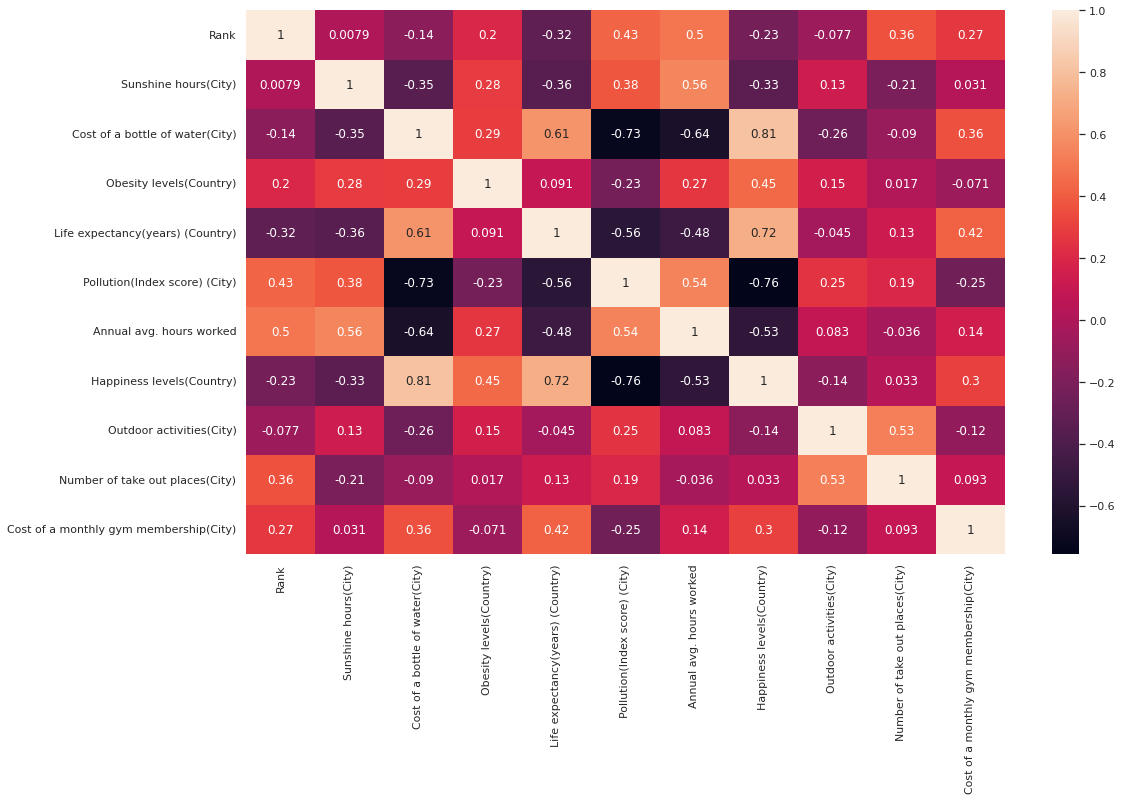

In [20]:
corr_df = df.corr()

plt.figure(figsize=(17, 10))
sns.heatmap(corr_df, annot=True)
plt.show()

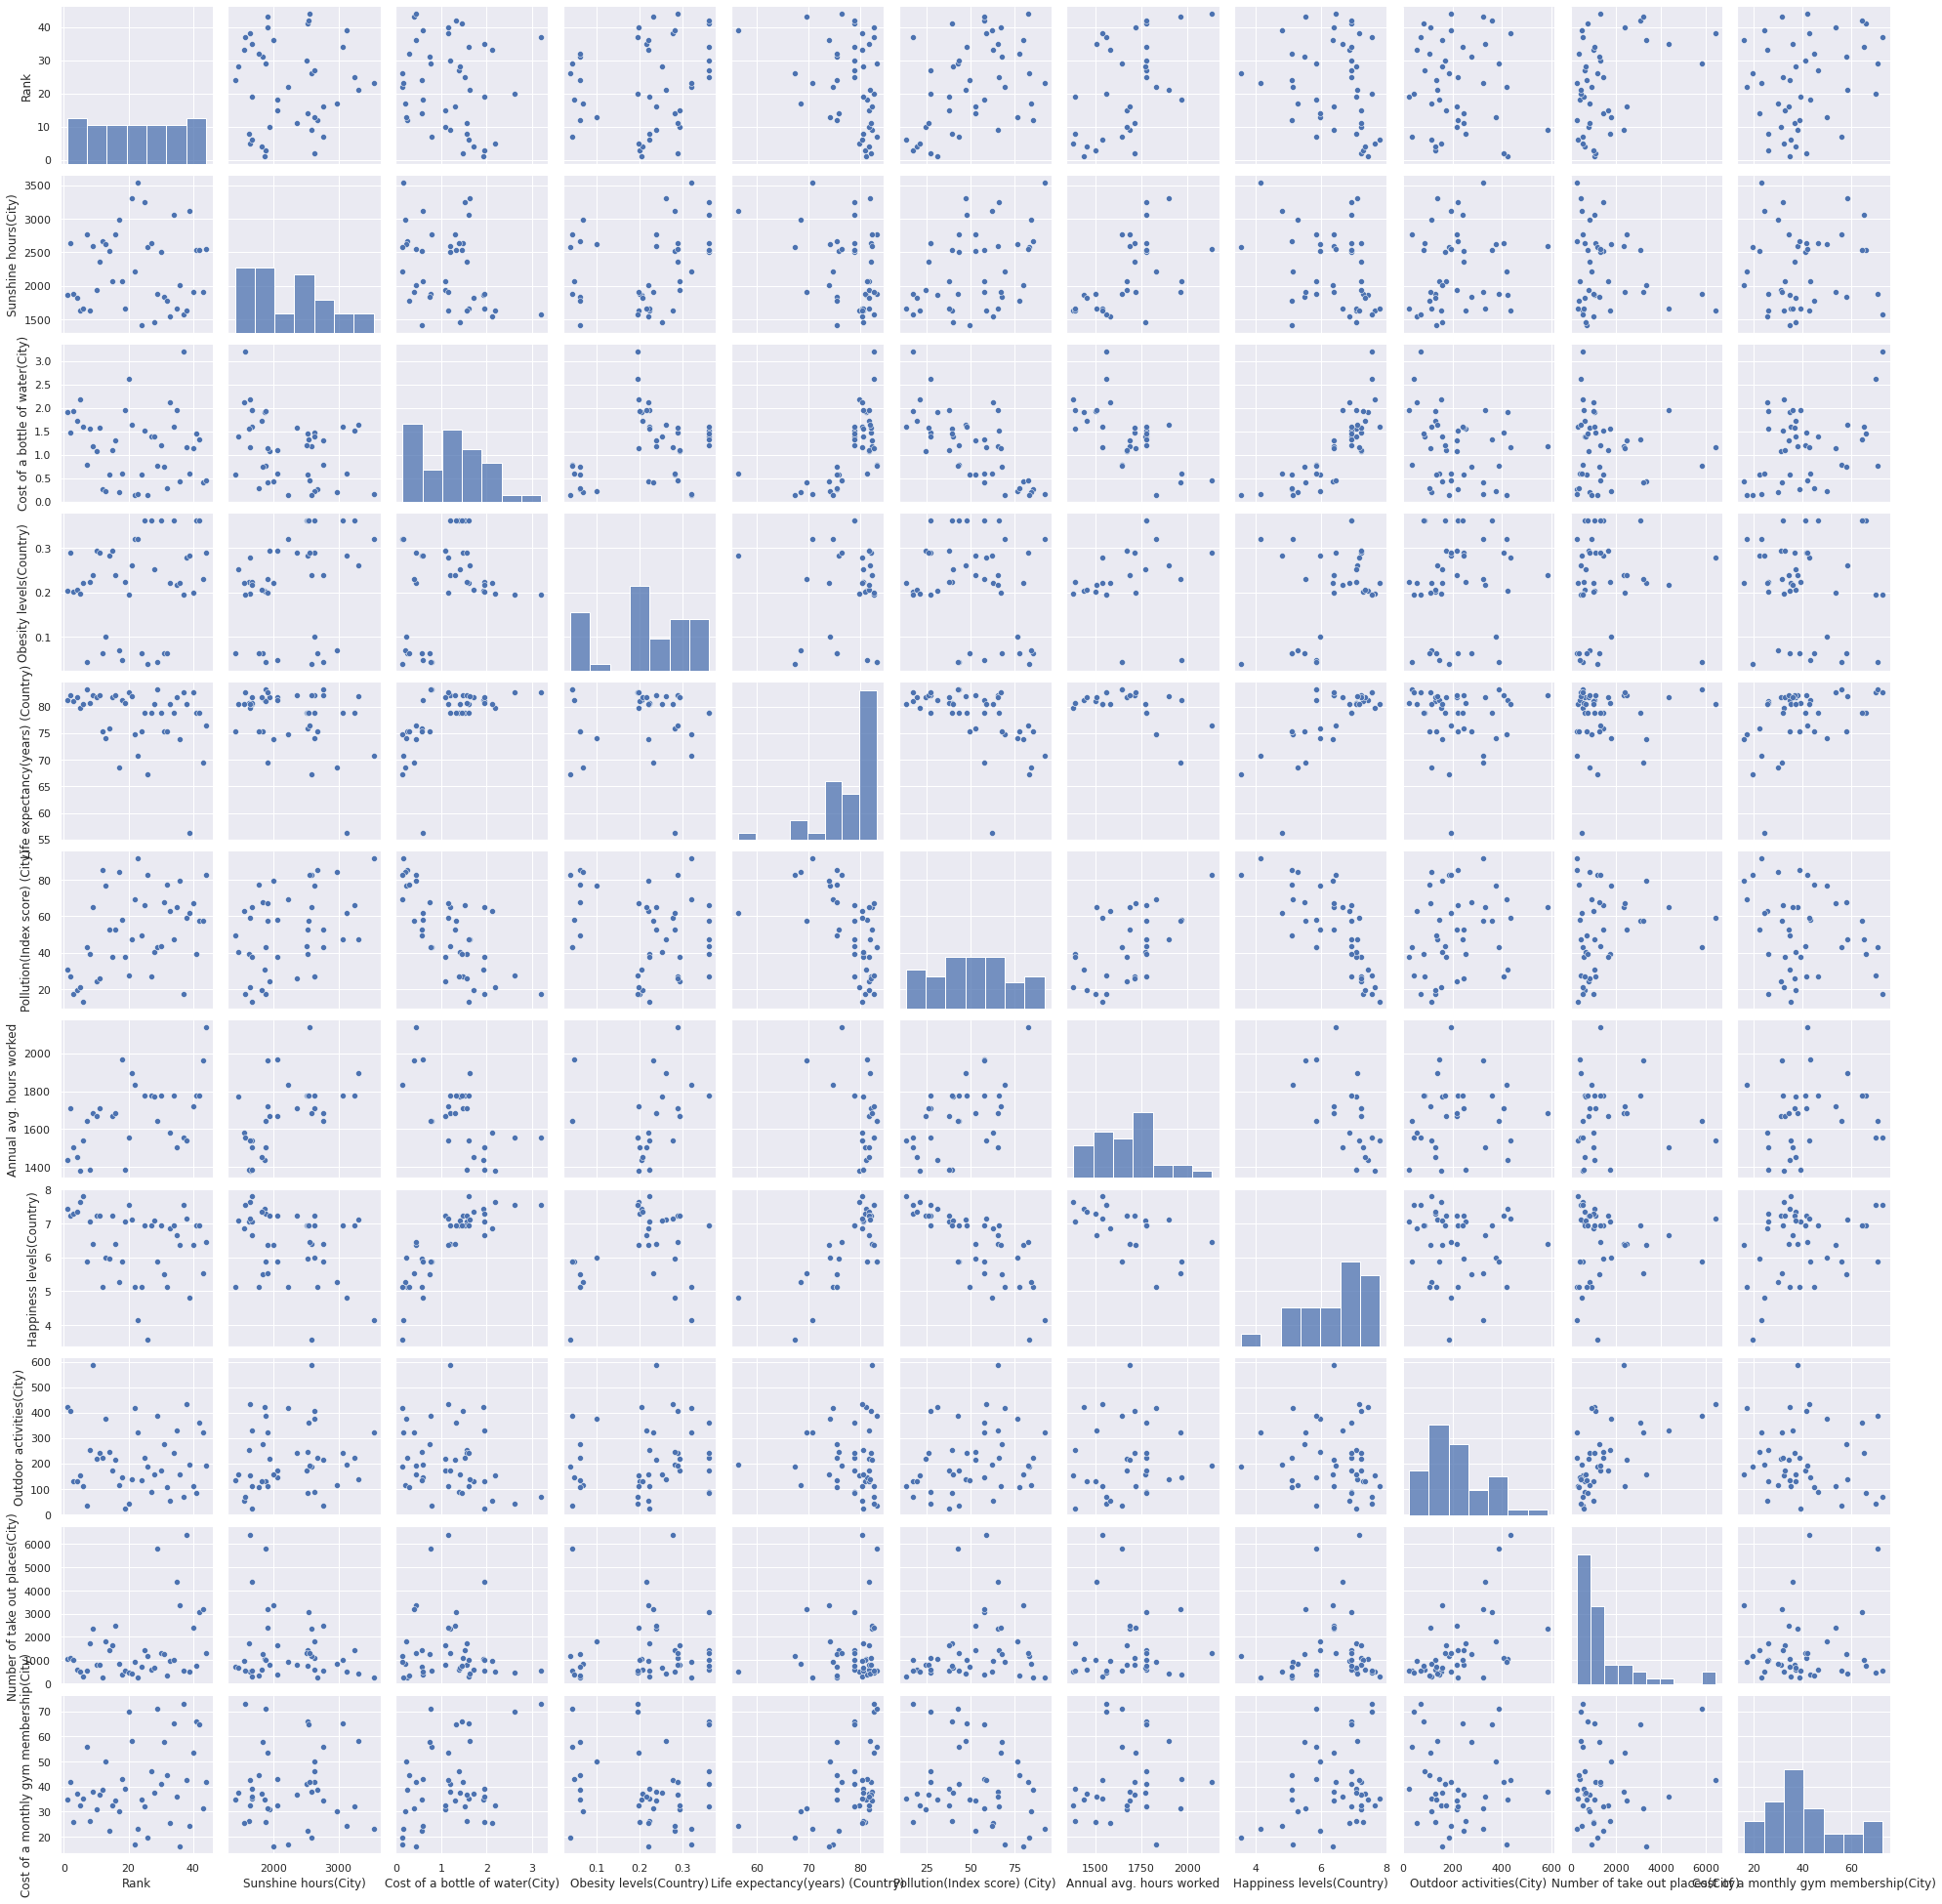

In [21]:
sns.set_theme(style='darkgrid')
sns.pairplot(df)

In [22]:
hc = {}
for col in corr_df.columns:
    for ind in corr_df.index:
        if corr_df.loc[ind, col] > 0.5 and corr_df.loc[ind, col] != 1:
            hc["{:.2f}".format(corr_df.loc[ind, col])] = f'{col} <-> {ind}'
            
hc_x = sorted(hc.items(), reverse=True)
for k, v in hc_x:
    print(k, '-------->', v)

0.81 --------> Happiness levels(Country) <-> Cost of a bottle of water(City)
0.72 --------> Happiness levels(Country) <-> Life expectancy(years) (Country)
0.61 --------> Life expectancy(years) (Country) <-> Cost of a bottle of water(City)
0.56 --------> Annual avg. hours worked <-> Sunshine hours(City)
0.54 --------> Annual avg. hours worked <-> Pollution(Index score) (City)
0.53 --------> Number of take out places(City) <-> Outdoor activities(City)


In [23]:
hrc = {}
for col in corr_df.columns:
    for ind in corr_df.index:
        if corr_df.loc[ind, col] < -0.5 and corr_df.loc[ind, col] != 1:
            hrc["{:.2f}".format(corr_df.loc[ind, col])] = f'{col} <-> {ind}'
            
hrc_x = sorted(hrc.items(), reverse=True)
for k, v in hrc_x:
    print(k, '-------->', v)

-0.76 --------> Happiness levels(Country) <-> Pollution(Index score) (City)
-0.73 --------> Pollution(Index score) (City) <-> Cost of a bottle of water(City)
-0.64 --------> Annual avg. hours worked <-> Cost of a bottle of water(City)
-0.56 --------> Pollution(Index score) (City) <-> Life expectancy(years) (Country)
-0.53 --------> Happiness levels(Country) <-> Annual avg. hours worked


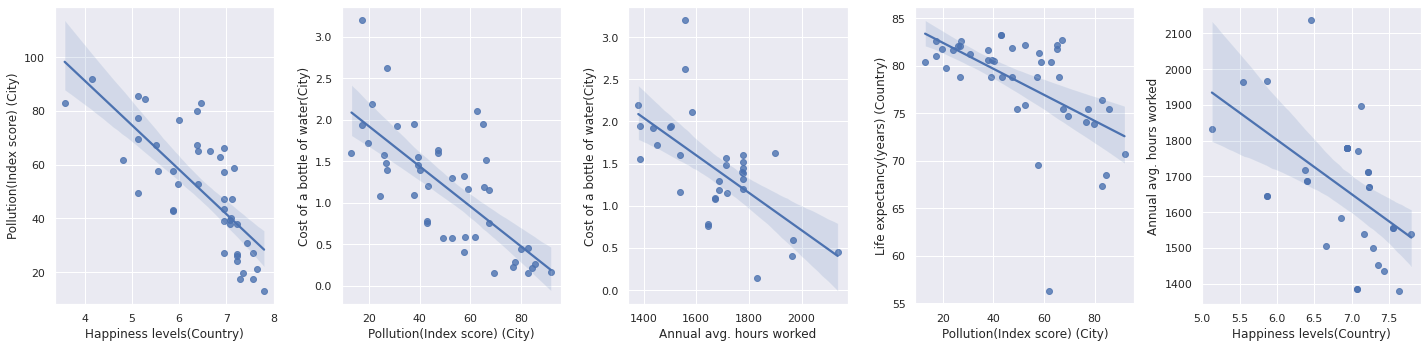

In [26]:
fig, axes = plt.subplots(1, 5, figsize=(20, 5))

for i, tup in enumerate(hrc_x):
    var1 = tup[1].split(' <-> ')[0]
    var2 = tup[1].split(' <-> ')[1]
    sns.regplot(data=df, x=var1, y=var2, ax=axes[i])

plt.tight_layout()
plt.show()

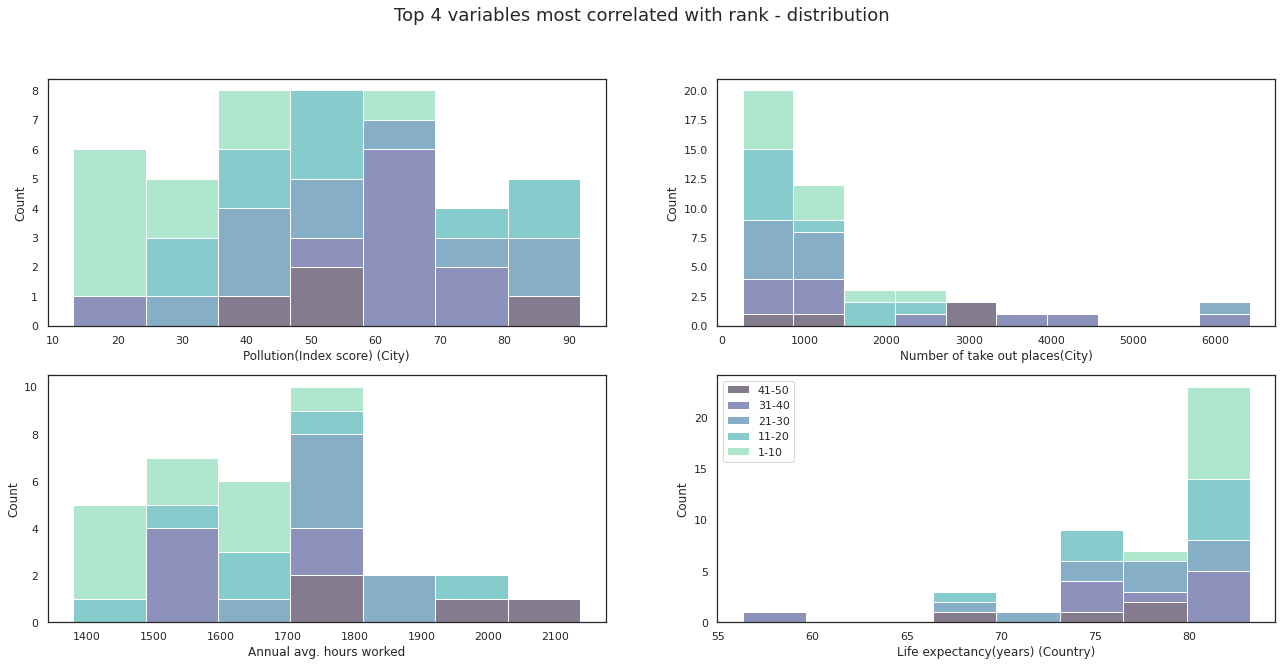

,City,Rank,Sunshine hours(City),Cost of a bottle of water(City),Obesity levels(Country),Life expectancy(years) (Country),Pollution(Index score) (City),Annual avg. hours worked,Happiness levels(Country),Outdoor activities(City),Number of take out places(City),Cost of a monthly gym membership(City),rank_gr
38,Johannesburg,39,3124.0,0.59,0.283,56.3,61.83,NaN,4.81,194,492,24.28,31-40


In [27]:
def my_devide(x):
    if x <= 10:
        return '1-10'
    elif x <= 20:
        return '11-20'
    elif x <= 30:
        return '21-30'
    elif x <= 40:
        return '31-40'
    else:
        return '41-50'
    
df['rank_gr'] = [my_devide(x) for x in df['Rank']]
sns.set_theme(style='white')
fig, axes = plt.subplots(2, 2, figsize=(22, 10))


cols = ['Pollution(Index score) (City)', 
        'Number of take out places(City)', 
        'Annual avg. hours worked', 
        'Life expectancy(years) (Country)'
       ]

i = 0
for r in range(2):
    for c in range(2):
        sns.histplot(data=df, x=cols[i], hue='rank_gr', 
                     multiple="stack", alpha=0.6, palette="mako_r", ax=axes[r, c], legend=False)
        i += 1
        
plt.suptitle('Top 4 variables most correlated with rank - distribution', fontsize=18)
plt.legend(loc=2, labels=sorted(df.rank_gr.unique(), reverse=True))
plt.show()

df[df['Life expectancy(years) (Country)'] == df['Life expectancy(years) (Country)'].min()]

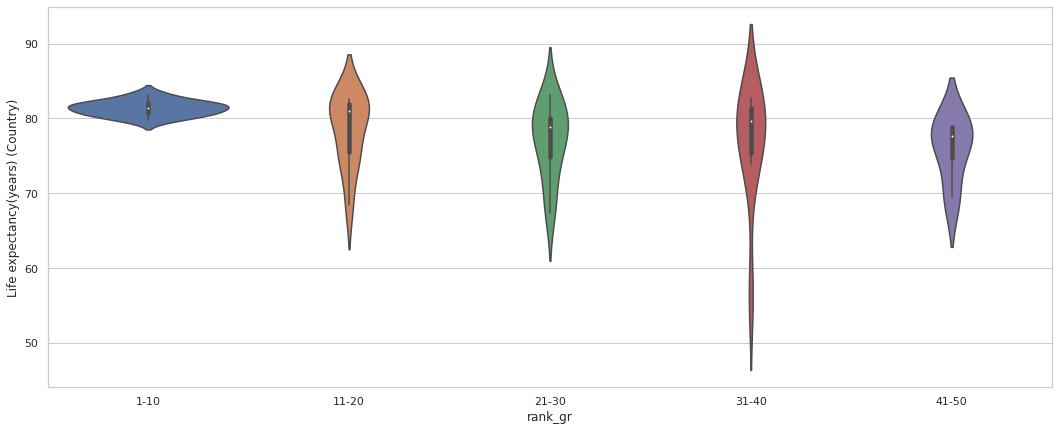

In [28]:
sns.set_theme(style='whitegrid')
plt.figure(figsize=(18, 7))
sns.violinplot(data=df, x='rank_gr', y='Life expectancy(years) (Country)')
plt.show()

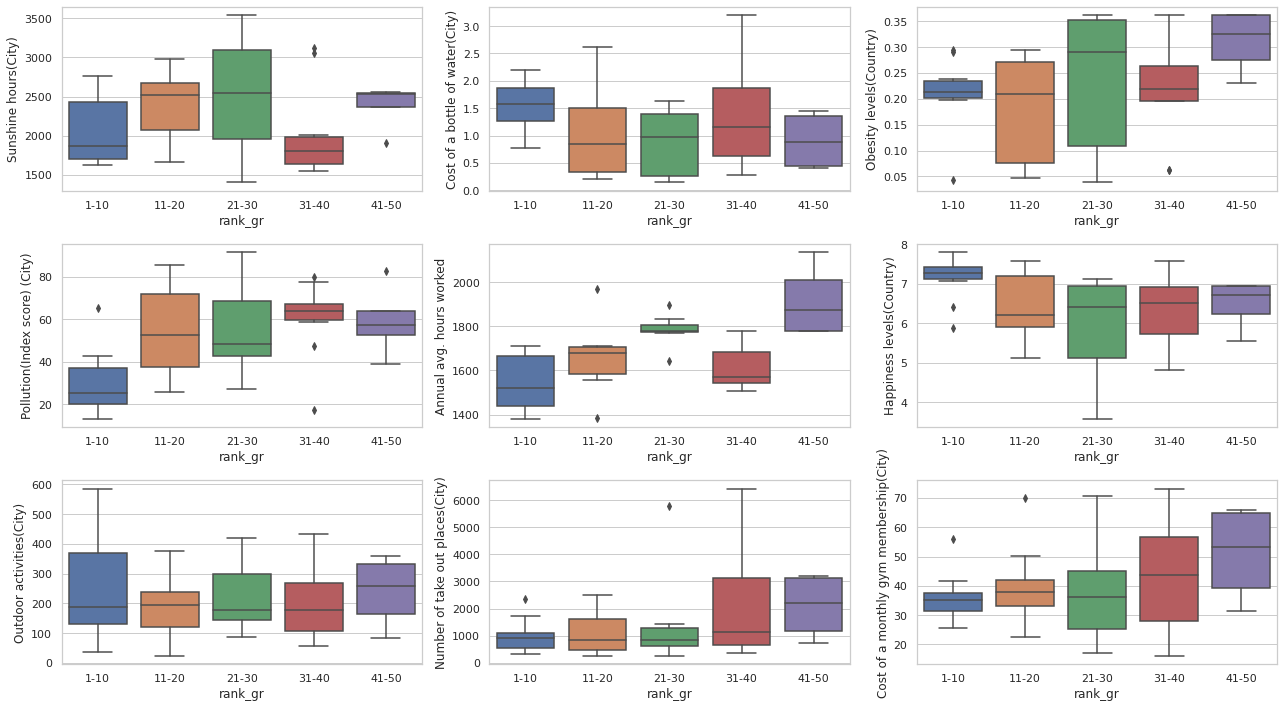

In [29]:
fig, axes = plt.subplots(3, 3, figsize=(18,10))
cols = df.drop(columns=['City', 'Rank', 'rank_gr', 'Life expectancy(years) (Country)']).columns

i = 0
for r in range(3):
    for c in range(3):
        sns.boxplot(data=df, x='rank_gr', y=cols[i], ax=axes[r, c])
        i += 1

plt.tight_layout()
plt.show()

In [30]:
tier = df['rank_gr'] == '1-10'
score = df[tier]['Obesity levels(Country)'].min()
tier_mean = df[tier]['Obesity levels(Country)'].mean()
all_mean = df['Obesity levels(Country)'].mean()
city = df[(df['Obesity levels(Country)'] == score) & tier]

print(f'Score (obesity): {score}')
print(f'Mean (tier 1-10): {tier_mean}')
print(f'Mean (all): {all_mean}')

Score (obesity): 0.043
Mean (tier 1-10): 0.2118
Mean (all): 0.21925


In [32]:
tier = df['rank_gr'] == '21-30'
score = df[tier]['Annual avg. hours worked'].max()
tier_mean = df[tier]['Annual avg. hours worked'].mean()
all_mean = df['Annual avg. hours worked'].mean()
city = df[(df['Annual avg. hours worked'] == score) & tier]

print(f'Score (hours worked): {score}')
print(f'Mean (tier 21-30): {tier_mean}')
print(f'Mean (all): {all_mean}')
city

Score (hours worked): 1898.0
Mean (tier 21-30): 1783.2857142857142
Mean (all): 1672.909090909091


,City,Rank,Sunshine hours(City),Cost of a bottle of water(City),Obesity levels(Country),Life expectancy(years) (Country),Pollution(Index score) (City),Annual avg. hours worked,Happiness levels(Country),Outdoor activities(City),Number of take out places(City),Cost of a monthly gym membership(City),rank_gr
20,Tel Aviv,21,3311.0,1.63,0.261,81.9,47.28,1898.0,7.12,139,420,58.31,21-30


In [33]:
score = df['Pollution(Index score) (City)'].min()
df[df['Pollution(Index score) (City)'] == score]

,City,Rank,Sunshine hours(City),Cost of a bottle of water(City),Obesity levels(Country),Life expectancy(years) (Country),Pollution(Index score) (City),Annual avg. hours worked,Happiness levels(Country),Outdoor activities(City),Number of take out places(City),Cost of a monthly gym membership(City),rank_gr
5,Helsinki,6,1662.0,1.6,0.222,80.4,13.08,1540.0,7.8,113,309,35.23,1-10


In [34]:
score = df['Pollution(Index score) (City)'].max()
df[df['Pollution(Index score) (City)'] == score]

,City,Rank,Sunshine hours(City),Cost of a bottle of water(City),Obesity levels(Country),Life expectancy(years) (Country),Pollution(Index score) (City),Annual avg. hours worked,Happiness levels(Country),Outdoor activities(City),Number of take out places(City),Cost of a monthly gym membership(City),rank_gr
22,Cairo,23,3542.0,0.16,0.32,70.7,91.74,NaN,4.15,323,250,23.25,21-30


In [35]:
score = df['Annual avg. hours worked'].min()
df[df['Annual avg. hours worked'] == score]

,City,Rank,Sunshine hours(City),Cost of a bottle of water(City),Obesity levels(Country),Life expectancy(years) (Country),Pollution(Index score) (City),Annual avg. hours worked,Happiness levels(Country),Outdoor activities(City),Number of take out places(City),Cost of a monthly gym membership(City),rank_gr
4,Copenhagen,5,1630.0,2.19,0.197,79.8,21.24,1380.0,7.64,154,523,32.53,1-10


In [36]:
water = df.sort_values('Cost of a monthly gym membership(City)')
gym = df.sort_values('Cost of a bottle of water(City)')

water_rank = {}
for i, c in enumerate(water.City):
    water_rank[c] = i

gym_rank = {}
for i, c in enumerate(gym.City):
    gym_rank[c] = i
    
water_df = pd.DataFrame(water_rank.values(), index=water_rank.keys(), columns=['rank'])
gym_df = pd.DataFrame(gym_rank.values(), index=gym_rank.keys(), columns=['rank'])

df_d = water_df.join(gym_df, lsuffix='_water', rsuffix='_gym')
df_d['diff_cost'] = df_d['rank_water'] - df_d['rank_gym']
df_d.sort_values('diff_cost')

,rank_water,rank_gym,diff_cost
Brussels,6,40,-34
Vienna,7,37,-30
Copenhagen,13,41,-28
Berlin,8,30,-22
Paris,19,38,-19
Amsterdam,17,36,-19
Los Angeles,12,29,-17
Helsinki,18,33,-15
Stockholm,21,35,-14
Frankfurt,25,39,-14


In [37]:
df_diff_corr = df[['City', 'Rank', 'rank_gr']].merge(df_d['diff_cost'], left_on='City', right_index=True)
df_diff_corr.corr()

,Rank,diff_cost
Rank,1.000000,0.359412
diff_cost,0.359412,1.000000


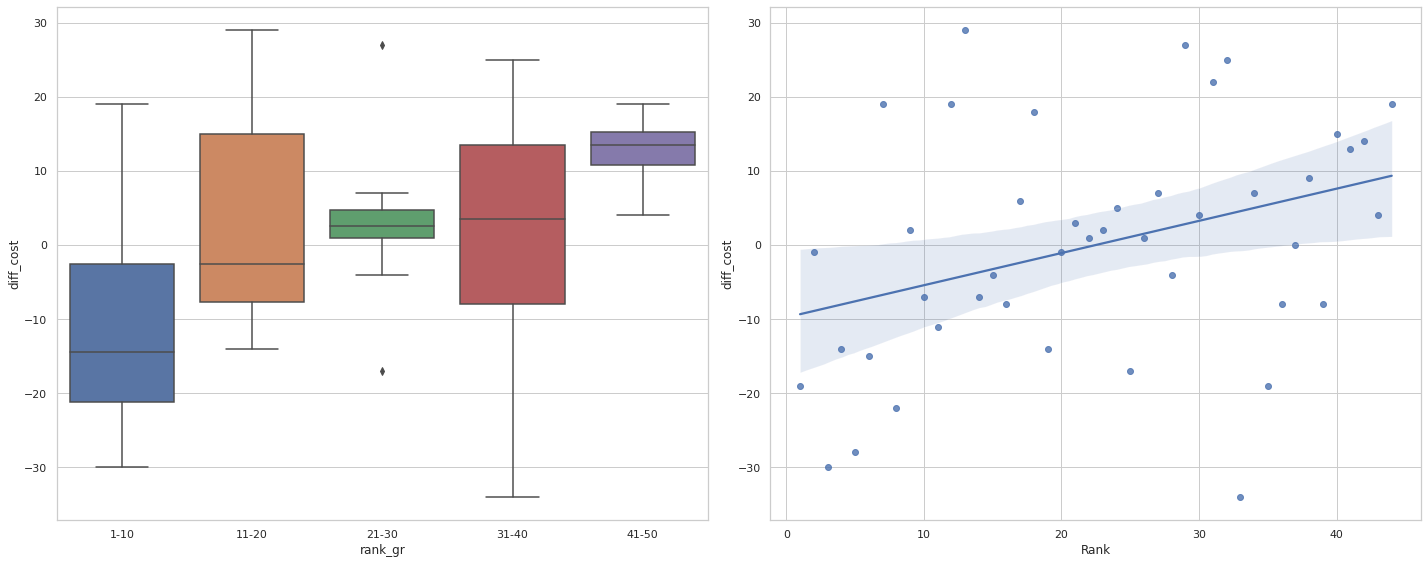

In [38]:
fig, axes = plt.subplots(1, 2, figsize=(20, 8))
sns.boxplot(data=df_diff_corr, x='rank_gr', y='diff_cost', ax=axes[0])
sns.regplot(data=df_diff_corr, x='Rank', y='diff_cost', ax=axes[1])
plt.tight_layout()
plt.show()